In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Data Understanding ###
+ Dataframe shape
+ head and tail
+ dtypes
+ describe

In [3]:
df = pd.read_csv('../csv/games.csv')
df.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


In [4]:
df.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [5]:
#check if for every competition_type there is a competition_id that is unique
df.groupby('competition_type')['competition_id'].nunique()

competition_type
domestic_cup         11
domestic_league      14
international_cup     5
other                13
Name: competition_id, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65216 entries, 0 to 65215
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 65216 non-null  int64  
 1   competition_id          65216 non-null  object 
 2   season                  65216 non-null  int64  
 3   round                   65216 non-null  object 
 4   date                    65216 non-null  object 
 5   home_club_id            65216 non-null  int64  
 6   away_club_id            65216 non-null  int64  
 7   home_club_goals         65216 non-null  int64  
 8   away_club_goals         65216 non-null  int64  
 9   home_club_position      45762 non-null  float64
 10  away_club_position      45762 non-null  float64
 11  home_club_manager_name  64474 non-null  object 
 12  away_club_manager_name  64474 non-null  object 
 13  stadium                 65005 non-null  object 
 14  attendance              55704 non-null

In [7]:
df.describe()

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance
count,6.521600e+04,65216.000000,65216.000000,65216.000000,65216.000000,65216.000000,45762.000000,45762.000000,55704.000000
mean,3.018125e+06,2017.252990,4921.579597,4441.948862,1.593290,1.321440,9.273043,9.456776,18060.337337
std,5.605215e+05,3.348529,11440.848691,10262.628710,1.427243,1.363181,5.299837,5.321858,17764.667425
min,2.211607e+06,2012.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.518596e+06,2014.000000,354.000000,347.000000,1.000000,0.000000,5.000000,5.000000,4300.000000
50%,2.919854e+06,2017.000000,995.000000,989.000000,1.000000,1.000000,9.000000,9.000000,12140.000000
75%,3.450800e+06,2020.000000,3205.000000,3028.000000,2.000000,2.000000,14.000000,14.000000,26184.000000
max,4.228114e+06,2023.000000,112753.000000,112755.000000,15.000000,19.000000,21.000000,21.000000,99354.000000


In [8]:
df.shape

(65216, 23)

In [9]:
df.loc[df['competition_id'] == 'KLUB'] # fifa_club_world_cup from other type of competition

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
1585,2384653,KLUB,2013,Semi-Finals,2013-12-17,10948,27,0,3,NaN,...,Stade Adrar,27311.0,Bakary Papa Gassama,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,FC Bayern München,0:3,other
3414,3515968,KLUB,2020,Semi-Finals,2021-02-08,7,27,0,2,NaN,...,Ahmad bin Ali Stadium,NaN,Mohammed Abdulla Hassan,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,FC Bayern München,0:2,other
5442,2283452,KLUB,2012,Third Place Play-Off,2012-12-16,7,2407,0,2,NaN,...,NISSAN Stadium,56301.0,Peter O´Leary,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,0:2,other
5504,2517432,KLUB,2014,Semi-Finals,2014-12-17,1775,11391,2,1,NaN,...,Stade de Marrakech,18485.0,Benjamin Williams,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,2:1,other
5505,2518506,KLUB,2014,Third Place Play-Off,2014-12-20,3711,11391,3,5,NaN,...,Stade de Marrakech,38345.0,Pedro Proença,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,3:5,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58442,3290641,KLUB,2019,First Round,2019-12-10,656,18393,3,1,NaN,...,Jassim Bin Hamad,7047.0,Mustapha Ghorbal,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,3:1,other
60180,4020739,KLUB,2022,Semi-Finals,2023-02-07,614,1114,2,3,NaN,...,Stade Ibn Batouta,42496.0,Istvan Kovacs,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,2:3,other
60181,4022148,KLUB,2022,Third Place Play-Off,2023-02-11,7,614,2,4,NaN,...,Stade Ibn Batouta,30216.0,Mustapha Ghorbal,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,2:4,other
62040,2804405,KLUB,2016,Second Round,2016-12-11,6356,2241,0,2,NaN,...,PANASONIC Stadium Suita,21702.0,Roberto García Orozco,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,0:2,other


In [10]:
df['competition_type'].unique()

array(['domestic_league', 'international_cup', 'domestic_cup', 'other'],
      dtype=object)

In [11]:
# for international cup we'll be grouping the matches by round.
df.loc[df['competition_type'] == 'international_cup']

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
169,2262154,CL,2012,Group D,2012-09-18,16,610,1,0,NaN,...,SIGNAL IDUNA PARK,65829.0,Paolo Tagliavento,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Borussia Dortmund,AFC Ajax Amsterdam,1:0,international_cup
170,2262190,CL,2012,Group B,2012-10-24,969,683,1,2,NaN,...,Stade de la Mosson,22834.0,Daniele Orsato,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Montpellier Hérault Sport Club,Olympiakos Syndesmos Filathlon Peiraios,1:2,international_cup
171,2262441,EL,2012,Group A,2012-10-25,31,2700,1,0,NaN,...,Anfield,39358.0,Bas Nijhuis,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Liverpool Football Club,Anzhi Makhachkala ( -2022),1:0,international_cup
181,2284471,EL,2012,intermediate stage 1st leg,2013-02-14,3368,683,3,0,NaN,...,Ciutat de València,17000.0,Manuel Gräfe,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Levante UD,Olympiakos Syndesmos Filathlon Peiraios,3:0,international_cup
182,2284475,EL,2012,intermediate stage 1st leg,2013-02-14,338,40,1,1,NaN,...,NSK Olimpisky,24953.0,Alexandru Tudor,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Futbolniy Klub Dynamo Kyiv,FC Girondins Bordeaux,1:1,international_cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65203,3631863,ECLQ,2021,3rd round 1st leg,2021-08-05,48332,10480,0,0,NaN,...,Kolos,NaN,Peter Kjaersgaard,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,FK Kolos Kovalivka,NaN,0:0,international_cup
65205,2262451,EL,2012,Group F,2012-10-25,383,272,1,1,NaN,...,Philips Stadion,14400.0,Emir Aleckovic,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,1:1,international_cup
65206,2469213,ELQ,2014,Second Round 1st leg,2014-07-17,987,21875,2,2,NaN,...,Fir Park,6700.0,Michael Johansen,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Motherwell Football Club,NaN,2:2,international_cup
65211,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,NaN,...,Philips Stadion,10000.0,Cristian Balaj,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,2:0,international_cup


+ game_id: Unique identifier for each game.
+ competition_id: Identifier for the competition in which the game took place.
+ season: The season in which the game occurred.
+ round: The specific round or matchday of the competition.
+ date: The date when the game was played.
+ home_club_id: Identifier for the home club participating in the game.
+ away_club_id: Identifier for the away club participating in the game.
+ home_club_goals: Number of goals scored by the home club in the game.
+ away_club_goals: Number of goals scored by the away club in the game.
+ home_club_position: Position of the home club in the league table at the time of the game.
+ away_club_position: Position of the away club in the league table at the time of the game.
+ home_club_manager_name: Name of the manager of the home club.
+ away_club_manager_name: Name of the manager of the away club.
+ stadium: Name of the stadium where the game was played.
+ attendance: The number of spectators or attendees at the game.
+ referee: Name of the referee officiating the game.
+ url: URL to access more information about the game, possibly on a website like Transfermarkt.
+ home_club_formation: Formation used by the home club in the game.
+ away_club_formation: Formation used by the away club in the game.
+ home_club_name: Name of the home club.
+ away_club_name: Name of the away club.
+ aggregate: Aggregate score of both legs if the game is part of a two-legged tie (e.g., in knockout competitions).
+ competition_type: Type of competition (e.g., domestic league, cup competition).

### Step 2: Data Preperation ###
+ Dropping irrelevant columns and rows
+ Identifying duplicated columns
+ Feature Creation

In [12]:
# checking NaN values of column "home_club_formation"
df['home_club_formation'].isnull().sum()

62347

In [13]:
# checking NaN values of column "away_club_formation"
df['away_club_formation'].isnull().sum()

62328

In [14]:
# checking NaN values of column "home_club_position"
df['home_club_position'].isnull().sum()

19454

In [15]:
# checking NaN values of column "away_club_position"
df['away_club_position'].isnull().sum()

19454

In [16]:
dff = df.dropna(subset=['home_club_formation', 'away_club_formation', 'home_club_position', 'away_club_position'])
dff

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
2842,4087929,GB1,2023,1. Matchday,2023-08-12,350,873,0,1,15.0,...,Bramall Lane,31194.0,John Brooks,https://www.transfermarkt.co.uk/sheffield-unit...,3-5-2 flat,4-2-3-1,Sheffield United Football Club,Crystal Palace Football Club,0:1,domestic_league
2843,4087952,GB1,2023,3. Matchday,2023-08-27,762,31,1,2,13.0,...,St James' Park,52214.0,John Brooks,https://www.transfermarkt.co.uk/newcastle-unit...,4-3-3 Attacking,4-3-3 Attacking,Newcastle United Football Club,Liverpool Football Club,1:2,domestic_league
2844,4087962,GB1,2023,4. Matchday,2023-09-02,281,931,5,1,1.0,...,Etihad Stadium,52899.0,Michael Oliver,https://www.transfermarkt.co.uk/manchester-cit...,4-2-3-1,4-3-3 Attacking,Manchester City Football Club,Fulham Football Club,5:1,domestic_league
2845,4087965,GB1,2023,5. Matchday,2023-09-16,405,873,3,1,7.0,...,Villa Park,40809.0,Darren England,https://www.transfermarkt.co.uk/aston-villa_cr...,4-2-3-1,4-4-1-1,Aston Villa Football Club,Crystal Palace Football Club,3:1,domestic_league
2846,4089283,DK1,2023,1. Matchday,2023-07-23,678,443,1,0,4.0,...,Ceres Park,12215.0,Jonas Hansen,https://www.transfermarkt.co.uk/aarhus-gf_vejl...,3-4-2-1,3-4-3,Aarhus Gymnastik Forening,Vejle Boldklub,1:0,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65115,4113067,ES1,2023,7. Matchday,2023-09-26,368,3302,5,1,12.0,...,Ramón Sánchez-Pizjuán,35729.0,Guillermo Cuadra Fernández,https://www.transfermarkt.co.uk/sevilla-fc_ud-...,4-2-3-1,4-4-2,Sevilla Fútbol Club S.A.D.,Unión Deportiva Almería S.A.D.,5:1,domestic_league
65116,4150622,GR1,2023,7. Matchday,2023-11-29,60949,3385,1,0,12.0,...,Panthessaliko Stadio,NaN,Aristidis Vatsios,https://www.transfermarkt.co.uk/volos-nps_pans...,4-2-3-1,4-2-3-1,Neos Podosferikos Syllogos Volou,Panserraikos Serres,1:0,domestic_league
65117,4093112,BE1,2023,1. Matchday,2023-07-30,475,3057,1,0,4.0,...,Daio Wasabi Stayen Stadium,7026.0,Jasper Vergoote,https://www.transfermarkt.co.uk/sint-truidense...,3-4-3,4-1-4-1,Koninklijke Sint-Truidense Voetbalvereniging,Royal Standard Club de Liège,1:0,domestic_league
65118,4089286,DK1,2023,1. Matchday,2023-07-24,2778,1063,4,1,1.0,...,Right to Dream Park,4143.0,Jens Maae,https://www.transfermarkt.co.uk/fc-nordsjaella...,4-3-3 Attacking,3-4-3,Fodbold Club Nordsjælland,Viborg Fodsports Forening,4:1,domestic_league


In [17]:
dff.shape 
# this is a subset data where we have removed the NaN values from the columns 
# "home_club_formation", "away_club_formation", "home_club_position", "away_club_position"

(1588, 23)

In [18]:
df = df[['competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type']]
df # this is the final dataframe after dropping the irrelevant columns

,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type
0,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,Stanislav Cherchesov,Unai Emery,Akhmat-Arena,21700.0,Vladislav Bezborodov,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,Andrey Kobelev,Rustem Khuzin,Metallurg,11400.0,Sergey Ivanov,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,Leonid Slutski,Dan Petrescu,Arena Khimki,12000.0,Sergey Karasev,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,Slaven Bilic,Kurban Berdyev,RZD Arena,11408.0,Sergey Karasev,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,Andrey Kobelev,Gadzhi Gadzhiev,Metallurg,7534.0,Timur Arslanbekov,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65211,EL,2013,Group B,2013-11-07,383,419,2,0,Phillip Cocu,Zoran Mamic,Philips Stadion,10000.0,Cristian Balaj,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,2:0,international_cup
65212,NLP,2015,Third Round,2015-10-27,383,16866,6,0,Phillip Cocu,Hennie in 't Hof,Philips Stadion,31000.0,Allard Lindhout,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,6:0,domestic_cup
65213,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,Mark van Bommel,Aleksey Baga,Philips Stadion,34200.0,Anthony Taylor,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup
65214,CGB,2023,Second Round,2023-08-29,512,1194,6,1,Alex Neil,Matt Taylor,bet365 Stadium,9410.0,Michael Salisbury,Stoke City,NaN,6:1,other


In [19]:
# checking for duplicated columns
df.duplicated().sum()

0

In [20]:
df.isna().sum()
# df.loc[df.duplicated()]

competition_id                0
season                        0
round                         0
date                          0
home_club_id                  0
away_club_id                  0
home_club_goals               0
away_club_goals               0
home_club_manager_name      742
away_club_manager_name      742
stadium                     211
attendance                 9512
referee                     594
home_club_name            11252
away_club_name            10049
aggregate                     0
competition_type              0
dtype: int64

### Step 3: Feature Understanding ###
1. **Goal Analysis**:
   - What is the average number of goals scored per game?
   - Which clubs have the highest average goals per game?
   - Is there a correlation between a club's position in the league table and their average goals scored per game?

2. **Manager Performance**:
   - How does a manager's name correlate with their team's performance (e.g., win rate)?
   - Are there any trends in the performance of teams under different managers?

3. **Home vs. Away Performance**:
   - Is there a difference in the average goals scored by home and away teams?
   - Do teams perform differently when playing at home versus away?

4. **Stadium Attendance**:
   - What are the average attendance figures for games held at different stadiums?
   - Is there a correlation between stadium attendance and the competitiveness of the game or the stature of the teams involved?

5. **League Standings**:
   - How does a club's position in the league table correlate with their performance in individual games?
   - Are there any noticeable trends or patterns in the league standings over different seasons?

6. **Referee Analysis**:
   - Is there any correlation between the referee officiating a game and the number of cards (yellow or red) issued? # apparently not in the dataset
   - Do certain referees tend to officiate higher-scoring games or games with more fouls?

7. **Formation Effectiveness**: # apparently all columns are NaN
   - Is there a correlation between the formation used by a team and their success in a game?
   - Which formations are most commonly used and are they associated with higher win rates?

8. **Competition Type Comparison**:
   - How do average goals, attendance, or other metrics differ between domestic league games and cup competitions?
   - Are there any notable differences in performance or spectator interest between different types of competitions?



In [21]:
# Goal Analysis
# What is the average number of goals scored per game?
avg_goals_per_game = df[['home_club_goals', 'away_club_goals']].mean().sum()
avg_goals_per_game

2.914729514229637

In [22]:
# Which clubs have the highest average goals per game?
avg_goals_per_game_club = df.groupby('home_club_name')[['home_club_goals', 'away_club_goals']].mean().sum(axis=1).sort_values(ascending=False)
avg_goals_per_game_club

home_club_name
Hvidovre Idrætsforening    4.454545
FK Polissya Zhytomyr       4.111111
Football Club Volendam     4.031250
FC Bayern München          3.907801
FK Baltika                 3.800000
                             ...   
Elazigspor                 2.088235
AO Xanthi                  2.055944
FK Obolon Kyiv             2.055556
Casa Pia Atlético Clube    1.966667
Le Havre Athletic Club     1.833333
Length: 426, dtype: float64

In [23]:
# Is there a correlation between a club's position in the league table and their average goals scored per game?
# we'll be using the subset data "dff" for this analysis
avg_goals_per_game_club_position = dff.groupby('home_club_position')[['home_club_goals', 'away_club_goals']].mean().sum(axis=1)
avg_goals_per_game_club_position

home_club_position
1.0     3.774194
2.0     3.173077
3.0     2.755556
4.0     2.739583
5.0     3.009901
6.0     2.700855
7.0     2.459770
8.0     2.969072
9.0     2.608696
10.0    2.626374
11.0    2.626374
12.0    2.891304
13.0    2.487179
14.0    2.405405
15.0    2.575758
16.0    2.703125
17.0    2.857143
18.0    2.941176
19.0    3.555556
20.0    2.928571
dtype: float64

### Little comment on position of club ###
In football leagues, the club positions in the table are typically determined by their points accumulation throughout the season. Here's how it generally works:

1. **Points:** Clubs earn points based on their results in matches. In most leagues, teams earn:
+ 3 points for a win
+ 1 point for a draw
+ 0 points for a loss
2. **Goal Difference:** If two or more clubs have the same number of points, their positions in the table are determined by goal difference. Goal difference is calculated by subtracting the total number of goals conceded from the total number of goals scored. For example, if a team has scored 20 goals and conceded 15, their goal difference would be +5.
3. **Goals Scored:** If clubs are still level after goal difference, the next tiebreaker is the total number of goals scored.
4. **Head-to-Head Record:** In some leagues, if clubs are still level after the above criteria, their head-to-head record against each other may be used as a tiebreaker.

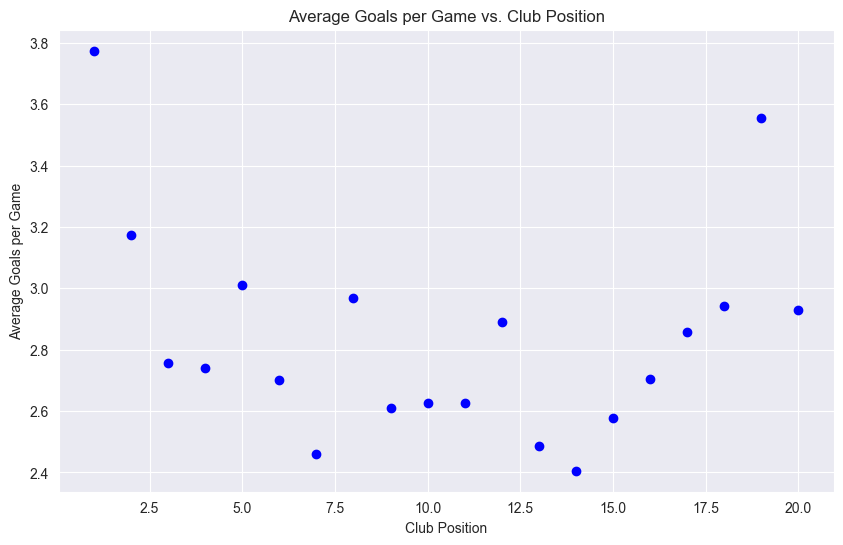

In [24]:
# Assuming avg_goals_per_game_club_position is a Series with club positions as indices and average goals per game as values
plt.figure(figsize=(10, 6))
plt.scatter(avg_goals_per_game_club_position.index, avg_goals_per_game_club_position.values, color='blue')
plt.title('Average Goals per Game vs. Club Position')
plt.xlabel('Club Position')
plt.ylabel('Average Goals per Game')
plt.grid(True)
plt.show()

In [25]:
# Manager Performance
# How does a manager's name correlate with their team's performance (e.g., win rate)?
# Are there any trends in the performance of teams under different managers?
# we'll be using the subset data "df" for this analysis
# win rate = (total wins / total games) * 100
df['home_club_win'] = np.where(df['home_club_goals'] > df['away_club_goals'], 1, 0)
df['away_club_win'] = np.where(df['away_club_goals'] > df['home_club_goals'], 1, 0)
df['total_win'] = df['home_club_win'] + df['away_club_win']
df['total_games'] = 1
manager_performance = df.groupby('home_club_manager_name')[['total_win', 'total_games']].sum()
manager_performance['win_rate'] = (manager_performance['total_win'] / manager_performance['total_games']) * 100
manager_performance

,total_win,total_games,win_rate
home_club_manager_name,,,
Aaron Callaghan,0,1,0.000000
Aaron Danks,1,1,100.000000
Aart Jan van Boksel,1,1,100.000000
Abdel Bouhazama,4,5,80.000000
Abdi Raqiib,1,1,100.000000
...,...,...,...
Ümit Özat,21,31,67.741935
Ünal Karaman,41,50,82.000000
İlhan Palut,4,6,66.666667


In [26]:
# let's exclude the managers with less than 10 games
manager_performance = manager_performance[manager_performance['total_games'] >= 10]
manager_performance

,total_win,total_games,win_rate
home_club_manager_name,,,
Abdullah Avci,114,158,72.151899
Abel Ferreira,60,69,86.956522
Abel Resino,10,16,62.500000
Abelardo,58,76,76.315789
Achim Beierlorzer,20,22,90.909091
...,...,...,...
Óskar Hrafn Thorvaldsson,10,10,100.000000
Ömer Erdogan,42,52,80.769231
Ümit Özat,21,31,67.741935


In [27]:
# Home vs. Away Performance
# Is there a difference in the average goals scored by home and away teams?
# Do teams perform differently when playing at home versus away?
# we'll be using the subset data "df" for this analysis
avg_goals_home_away = df[['home_club_goals', 'away_club_goals']].mean()
avg_goals_home_away

home_club_goals    1.59329
away_club_goals    1.32144
dtype: float64

In [28]:
# Stadium Attendance
# What are the average attendance figures for games held at different stadiums?
# Is there a correlation between stadium attendance and the competitiveness of the game or the stature of the teams involved?
# we'll be using the subset data "df" for this analysis
avg_attendance_stadium = df.groupby('stadium')['attendance'].mean().sort_values(ascending=False)
avg_attendance_stadium

stadium
Old Trafford                     73640.751880
Spotify Camp Nou                 73278.369811
SIGNAL IDUNA PARK                72816.798354
Allianz Arena                    69417.572581
Wembley Stadium                  68677.275862
                                     ...     
Yeni Sakarya Atatürk Stadyumu             NaN
Zirineio Stadium                          NaN
Zorya                                     NaN
Ølstykke Stadion                          NaN
Új Hidegkuti Nándor Stadion               NaN
Name: attendance, Length: 2282, dtype: float64

In [29]:
# League Standings
# How does a club's position in the league table correlate with their performance in individual games?
# Are there any noticeable trends or patterns in the league standings over different seasons?
# we'll be using the subset data "dff" for this analysis
# win rate = (total wins / total games) * 100
dff['home_club_win'] = np.where(dff['home_club_goals'] > dff['away_club_goals'], 1, 0)
dff['away_club_win'] = np.where(dff['away_club_goals'] > dff['home_club_goals'], 1, 0)
dff['total_win'] = dff['home_club_win'] + dff['away_club_win']
dff['total_games'] = 1
club_performance = dff.groupby('home_club_position')[['total_win', 'total_games']].sum()
club_performance['win_rate'] = (club_performance['total_win'] / club_performance['total_games']) * 100
club_performance

,total_win,total_games,win_rate
home_club_position,,,
1.0,88,93,94.623656
2.0,90,104,86.538462
3.0,74,90,82.222222
4.0,76,96,79.166667
5.0,79,101,78.217822
6.0,89,117,76.068376
7.0,59,87,67.816092
8.0,64,97,65.979381
9.0,53,92,57.608696


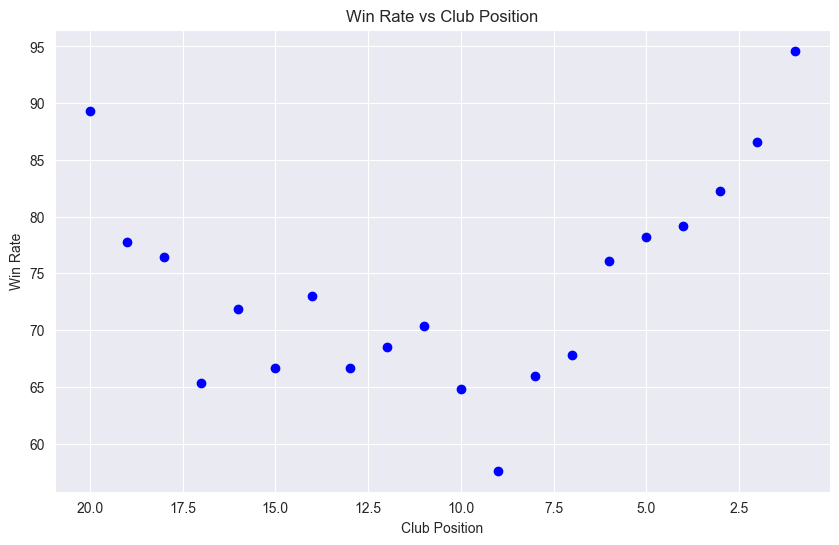

In [30]:
import matplotlib.pyplot as plt

# Assuming club_performance is a DataFrame with 'win_rate' as one of its columns and the club position as its index
plt.figure(figsize=(10, 6))
plt.scatter(club_performance.index, club_performance['win_rate'], color='blue')
plt.title('Win Rate vs Club Position')
plt.xlabel('Club Position')
plt.ylabel('Win Rate')
plt.grid(True)
plt.gca().invert_xaxis()  # This is to make the position 1 at the start of x-axis
plt.show()

In [31]:
# Referee Analysis
# Is there any correlation between the referee officiating a game and the number of cards (yellow or red) issued? (apparently not in the dataset
# Do certain referees tend to officiate higher-scoring games or games with more fouls?
# we'll be using the subset data "df" for this analysis

# Calculate the total number of goals scored by each referee
referee_goals = df.groupby('referee')[['home_club_goals', 'away_club_goals']].sum()

# Count the total number of games officiated by each referee
referee_games = df['referee'].value_counts()

# Normalize the total number of goals by the total number of games for each referee
referee_avg_goals_per_game = referee_goals.div(referee_games, axis=0)

# Calculate the average goals scored per game for each referee
referee_avg_goals_per_game['total_goals'] = referee_avg_goals_per_game.sum(axis=1)

# Sort referees by average goals per game
referee_avg_goals_per_game = referee_avg_goals_per_game.sort_values(by='total_goals', ascending=False)

# Print or visualize the result
print(referee_avg_goals_per_game)


                              home_club_goals  away_club_goals  total_goals
referee                                                                    
Rob Wassink                              11.0             12.0         23.0
Andriy Kholyavko                         10.0             11.0         21.0
Spyros Kazanas                            9.0             10.0         19.0
Francisco Villena Contreras              10.0              9.0         19.0
Javier Fernández Santesteban              9.0              8.0         17.0
...                                       ...              ...          ...
Jorge Faustino                            0.0              0.0          0.0
Haris Kaljanac                            0.0              0.0          0.0
Dionysios Zougras                         0.0              0.0          0.0
Mohammad Usman Aslam                      0.0              0.0          0.0
Dean Watson                               0.0              0.0          0.0

[2351 rows 

In [32]:
# Formation Effectiveness (apparently all columns are NaN)

In [33]:
# Competition Type Comparison
# How do average goals, attendance, or other metrics differ between domestic league games and cup competitions? 
# Are there any notable differences in performance or spectator interest between different types of competitions?
# we'll be using the subset data "df" for this analysis
# Average goals per game by competition type
avg_goals_competition = df.groupby('competition_type')[['home_club_goals', 'away_club_goals']].mean().sum(axis=1)
avg_goals_competition

competition_type
domestic_cup         3.701026
domestic_league      2.722601
international_cup    2.859950
other                4.365239
dtype: float64

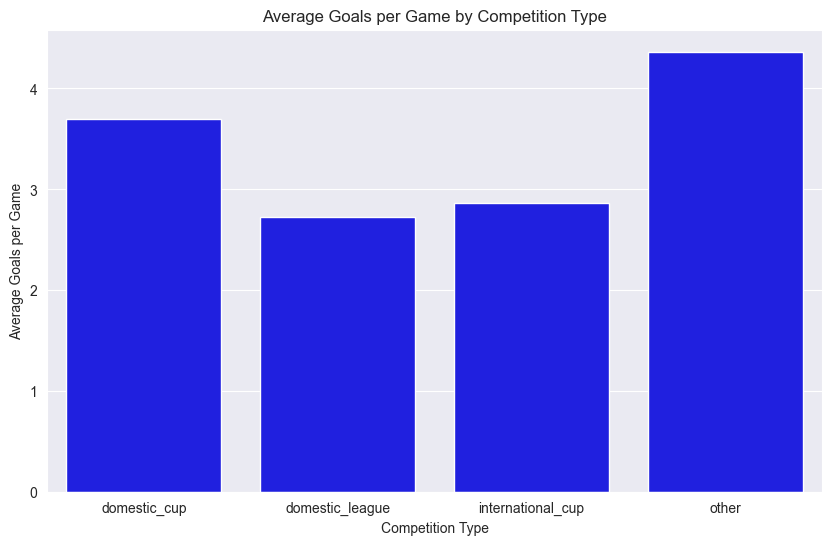

In [34]:
# barplot for average goals per game by competition type
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_goals_competition.index, y=avg_goals_competition.values, color='blue')
plt.title('Average Goals per Game by Competition Type')
plt.xlabel('Competition Type')
plt.ylabel('Average Goals per Game')
plt.show()